In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/Users/jaeeponde/Jaee_Ponde_A1/Decision Tree Task/data/train_data.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,619,CASH_IN,386385.08,C421351828,4669568.85,5055953.92,C1977099364,506035.06,119649.98,0,0
1,164,CASH_IN,212458.78,C83569848,234635.00,447093.78,C1690589535,806037.88,593579.10,0,0
2,382,PAYMENT,19967.60,C852995095,3634.00,0.00,M1695416333,0.00,0.00,0,0
3,180,CASH_OUT,527616.51,C61761046,180216.00,0.00,C577654587,92157.10,619773.61,0,0
4,36,TRANSFER,206067.85,C758004147,0.00,0.00,C2143015292,2131494.48,2337562.32,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5090091,155,CASH_IN,129715.85,C170740978,5054252.83,5183968.68,C1810492506,246692.94,116977.09,0,0
5090092,186,PAYMENT,2459.70,C1844108072,0.00,0.00,M1858126655,0.00,0.00,0,0
5090093,350,CASH_OUT,10579.16,C1579684659,59279.00,48699.84,C1119180135,322754.16,333333.32,0,0
5090094,307,CASH_OUT,73020.76,C379222646,20289.00,0.00,C1962227951,256102.84,329123.61,0,0


In [6]:
df.to_csv('/Users/jaeeponde/Jaee_Ponde_A1/traindata.csv',index='False')

In [3]:
df=df.drop(columns=['isFlaggedFraud'])

In [4]:
df=df.drop(columns=['nameOrig','nameDest'])

#we should drop this, as its almost unique for everything

In [8]:
df['extracted']=df['amount']==df['oldbalanceOrg']

In [9]:
df['extracted']

0          False
1          False
2          False
3          False
4          False
           ...  
5090091    False
5090092    False
5090093    False
5090094    False
5090095    False
Name: extracted, Length: 5090096, dtype: bool

In [10]:
fraudulent_counts = df.groupby('extracted')['isFraud'].sum().reset_index()

In [11]:
fraudulent_counts

,extracted,isFraud
0,False,149
1,True,6444


In [81]:
fraudulent_counts = df.groupby('nameDest')['isFraud'].sum().reset_index()

In [82]:
fraudulent_counts = fraudulent_counts[fraudulent_counts['isFraud'] > 0]

In [86]:
#every name dest is almost unique for every fraud, so we can let both the name columns go

In [12]:
fraudulent_counts = df.groupby('step')['isFraud'].sum().reset_index()
fraudulent_counts

,step,isFraud
0,1,12
1,2,7
2,3,2
3,4,8
4,5,4
...,...,...
738,739,9
739,740,5
740,741,15
741,742,11


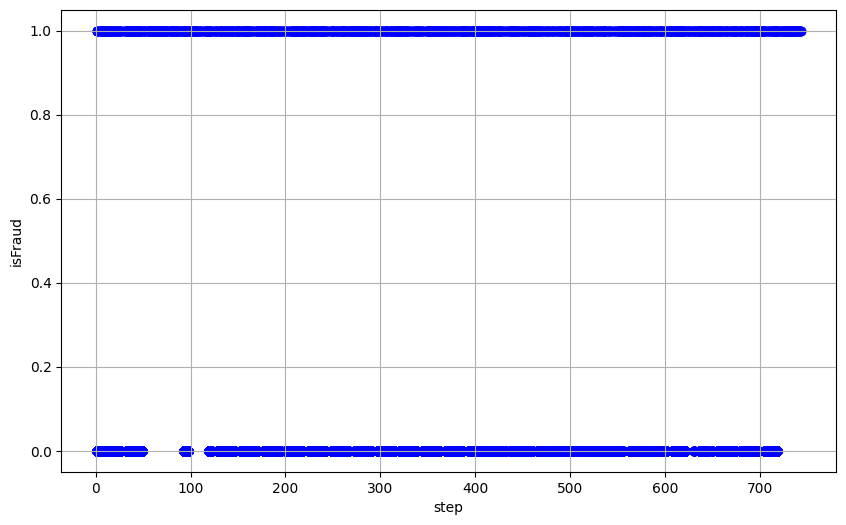

In [14]:

import pandas as pd
import matplotlib.pyplot as plt

col1 = 'step'
col2 = 'isFraud'

plt.figure(figsize=(10, 6))
plt.scatter(df[col1], df[col2], alpha=0.3, color='blue')  # alpha for transparency
plt.title('')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

In [90]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,619,CASH_IN,386385.08,4669568.85,5055953.92,506035.06,119649.98,0
1,164,CASH_IN,212458.78,234635.00,447093.78,806037.88,593579.10,0
2,382,PAYMENT,19967.60,3634.00,0.00,0.00,0.00,0
3,180,CASH_OUT,527616.51,180216.00,0.00,92157.10,619773.61,0
4,36,TRANSFER,206067.85,0.00,0.00,2131494.48,2337562.32,0
...,...,...,...,...,...,...,...,...
5090091,155,CASH_IN,129715.85,5054252.83,5183968.68,246692.94,116977.09,0
5090092,186,PAYMENT,2459.70,0.00,0.00,0.00,0.00,0
5090093,350,CASH_OUT,10579.16,59279.00,48699.84,322754.16,333333.32,0
5090094,307,CASH_OUT,73020.76,20289.00,0.00,256102.84,329123.61,0


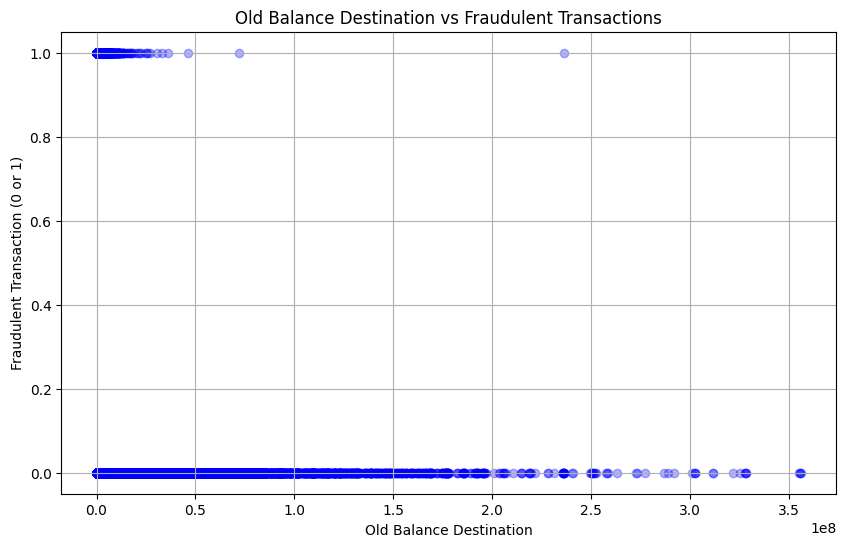

In [15]:

import pandas as pd
import matplotlib.pyplot as plt

col1 = 'oldbalanceDest'
col2 = 'isFraud'

plt.figure(figsize=(10, 6))
plt.scatter(df[col1], df[col2], alpha=0.3, color='blue')  # alpha for transparency
plt.title('Old Balance Destination vs Fraudulent Transactions')
plt.xlabel('Old Balance Destination')
plt.ylabel('Fraudulent Transaction (0 or 1)')
plt.grid(True)
plt.show()

#almost the same as new balance dest




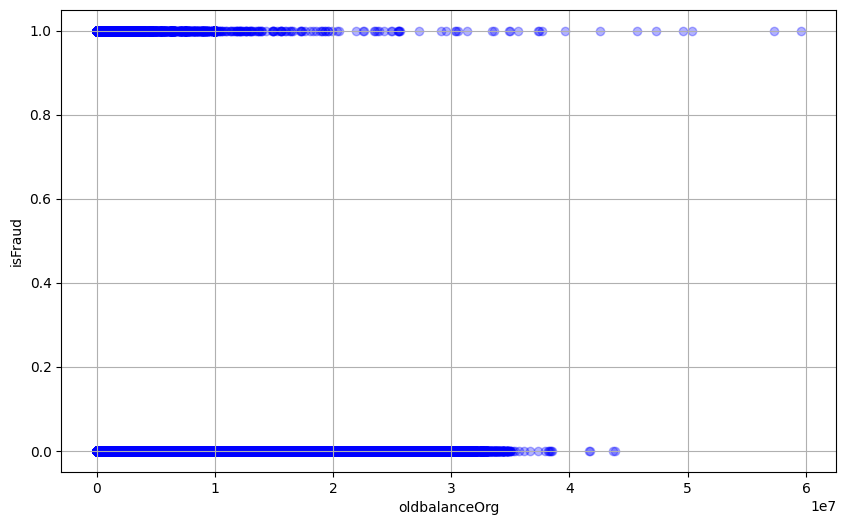

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

col1 = 'oldbalanceOrg'
col2 = 'isFraud'

plt.figure(figsize=(10, 6))
plt.scatter(df[col1], df[col2], alpha=0.3, color='blue')  # alpha for transparency
plt.title('')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

#almost the same as new balance dest

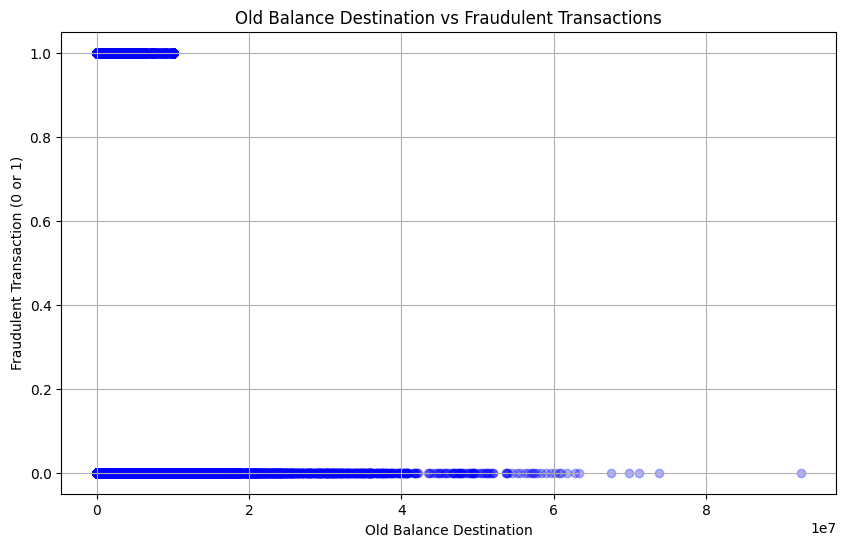

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = 'amount'
col2 = 'isFraud'

plt.figure(figsize=(10, 6))
plt.scatter(df[col1], df[col2], alpha=0.3, color='blue')  # alpha for transparency
plt.title('Old Balance Destination vs Fraudulent Transactions')
plt.xlabel('Old Balance Destination')
plt.ylabel('Fraudulent Transaction (0 or 1)')
plt.grid(True)
plt.show()

#almost the same as new balance dest

In [94]:
# for step column specifically, 50-120 is a suspicious place !!
# amount, oldbalorg, oldbal dest needs to be binned

In [18]:
df=df.drop(columns =['newbalanceDest','newbalanceOrig'])
df

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,exctrcated,extracted
0,619,CASH_IN,386385.08,4669568.85,506035.06,0,False,False
1,164,CASH_IN,212458.78,234635.00,806037.88,0,False,False
2,382,PAYMENT,19967.60,3634.00,0.00,0,False,False
3,180,CASH_OUT,527616.51,180216.00,92157.10,0,False,False
4,36,TRANSFER,206067.85,0.00,2131494.48,0,False,False
...,...,...,...,...,...,...,...,...
5090091,155,CASH_IN,129715.85,5054252.83,246692.94,0,False,False
5090092,186,PAYMENT,2459.70,0.00,0.00,0,False,False
5090093,350,CASH_OUT,10579.16,59279.00,322754.16,0,False,False
5090094,307,CASH_OUT,73020.76,20289.00,256102.84,0,False,False


In [19]:
import numpy as np

# Replace step values based on the condition
df['step'] = np.where((df['step']>= 50 ) & (df['step'] <= 120), 1, 0.5)

df


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,exctrcated,extracted
0,0.5,CASH_IN,386385.08,4669568.85,506035.06,0,False,False
1,0.5,CASH_IN,212458.78,234635.00,806037.88,0,False,False
2,0.5,PAYMENT,19967.60,3634.00,0.00,0,False,False
3,0.5,CASH_OUT,527616.51,180216.00,92157.10,0,False,False
4,0.5,TRANSFER,206067.85,0.00,2131494.48,0,False,False
...,...,...,...,...,...,...,...,...
5090091,0.5,CASH_IN,129715.85,5054252.83,246692.94,0,False,False
5090092,0.5,PAYMENT,2459.70,0.00,0.00,0,False,False
5090093,0.5,CASH_OUT,10579.16,59279.00,322754.16,0,False,False
5090094,0.5,CASH_OUT,73020.76,20289.00,256102.84,0,False,False


In [21]:

df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':0, 'DEBIT':0, 'CASH_OUT':0.5, 'TRANSFER':0.5})

# Verify the binned columns
df


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,extracted
0,0.5,0.0,386385.08,4669568.85,506035.06,0,False
1,0.5,0.0,212458.78,234635.00,806037.88,0,False
2,0.5,0.0,19967.60,3634.00,0.00,0,False
3,0.5,0.5,527616.51,180216.00,92157.10,0,False
4,0.5,0.5,206067.85,0.00,2131494.48,0,False
...,...,...,...,...,...,...,...
5090091,0.5,0.0,129715.85,5054252.83,246692.94,0,False
5090092,0.5,0.0,2459.70,0.00,0.00,0,False
5090093,0.5,0.5,10579.16,59279.00,322754.16,0,False
5090094,0.5,0.5,73020.76,20289.00,256102.84,0,False


In [26]:
df=df.drop(columns=['amount','oldbalanceOrg','oldbalanceDest'])
df

,step,type,isFraud,extracted
0,0.5,0.0,0,False
1,0.5,0.0,0,False
2,0.5,0.0,0,False
3,0.5,0.5,0,False
4,0.5,0.5,0,False
...,...,...,...,...
5090091,0.5,0.0,0,False
5090092,0.5,0.0,0,False
5090093,0.5,0.5,0,False
5090094,0.5,0.5,0,False


In [27]:
df['extracted']=df['extracted'].astype(int)

In [28]:
df

,step,type,isFraud,extracted
0,0.5,0.0,0,0
1,0.5,0.0,0,0
2,0.5,0.0,0,0
3,0.5,0.5,0,0
4,0.5,0.5,0,0
...,...,...,...,...
5090091,0.5,0.0,0,0
5090092,0.5,0.0,0,0
5090093,0.5,0.5,0,0
5090094,0.5,0.5,0,0
